In [1]:
!pip install ucimlrepo --quiet
!pip install xgboost
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Fetch the full dataset
dota = fetch_ucirepo(id=367)

# Extract features and target
X = dota.data.features
y = dota.data.targets

# Show metadata and preview
print(dota.metadata.get('title', 'Dota 2 Dataset'), "-", X.shape[0], "games")
print(X.shape, y.value_counts().to_dict())
X.head()

Dota 2 Dataset - 102944 games
(102944, 115) {(1,): 54284, (-1,): 48660}


,gamemode,gametype,hero1,hero2,hero3,hero4,hero5,hero6,hero7,hero8,...,hero104,hero105,hero106,hero107,hero108,hero109,hero110,hero111,hero112,hero113
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,1,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,0,1,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,0,0,0,0,0,-1,0,...,-1,0,0,0,0,0,0,0,0,0
4,2,3,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Combine features and target
data = X.copy()
data['win'] = y  # Assuming 'win' is 1 if won, 0 if lost

# Drop rows with any missing values (or handle them another way)
data = data.dropna()

# Separate features and target
X_clean = data.drop(columns=['win'])
y_clean = data['win']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6000291417747341
Confusion Matrix:
 [[4960 4737]
 [3498 7394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.51      0.55      9697
           1       0.61      0.68      0.64     10892

    accuracy                           0.60     20589
   macro avg       0.60      0.60      0.59     20589
weighted avg       0.60      0.60      0.60     20589



In [10]:
#XG Boost model



# Replace -1 with 0 in both training and test targets
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)


In [11]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


C:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:18:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.5892952547476809
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.51      0.54      9697
           1       0.60      0.66      0.63     10892

    accuracy                           0.59     20589
   macro avg       0.59      0.58      0.58     20589
weighted avg       0.59      0.59      0.59     20589



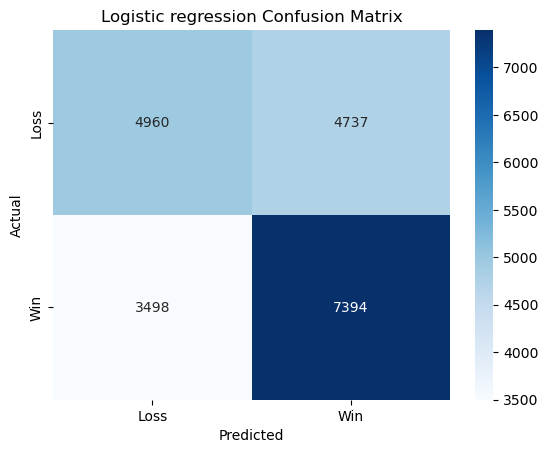

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic regression Confusion Matrix')
plt.show()


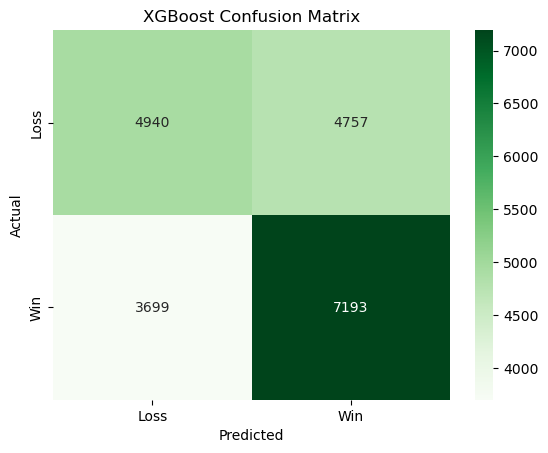

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


In [26]:
# Re-define the hero ID to name mapping after code execution state reset

hero_id_to_name = {
    1: "Anti-Mage", 2: "Axe", 3: "Bane", 4: "Bloodseeker", 5: "Crystal Maiden",
    6: "Drow Ranger", 7: "Earthshaker", 8: "Juggernaut", 9: "Mirana", 10: "Morphling",
    11: "Shadow Fiend", 12: "Phantom Lancer", 13: "Puck", 14: "Pudge", 15: "Razor",
    16: "Sand King", 17: "Storm Spirit", 18: "Sven", 19: "Tiny", 20: "Vengeful Spirit",
    21: "Windranger", 22: "Zeus", 23: "Kunkka", 25: "Lina", 26: "Lion", 27: "Shadow Shaman",
    28: "Slardar", 29: "Tidehunter", 30: "Witch Doctor", 31: "Lich", 32: "Riki",
    33: "Enigma", 34: "Tinker", 35: "Sniper", 36: "Necrophos", 37: "Warlock",
    38: "Beastmaster", 39: "Queen of Pain", 40: "Venomancer", 41: "Faceless Void",
    42: "Wraith King", 43: "Death Prophet", 44: "Phantom Assassin", 45: "Pugna",
    46: "Templar Assassin", 47: "Viper", 48: "Luna", 49: "Dragon Knight",
    50: "Dazzle", 51: "Clockwerk", 52: "Leshrac", 53: "Nature's Prophet", 54: "Lifestealer",
    55: "Dark Seer", 56: "Clinkz", 57: "Omniknight", 58: "Enchantress", 59: "Huskar",
    60: "Night Stalker", 61: "Broodmother", 62: "Bounty Hunter", 63: "Weaver",
    64: "Jakiro", 65: "Batrider", 66: "Chen", 67: "Spectre", 68: "Ancient Apparition",
    69: "Doom", 70: "Ursa", 71: "Spirit Breaker", 72: "Gyrocopter", 73: "Alchemist",
    74: "Invoker", 75: "Silencer", 76: "Outworld Destroyer", 77: "Lycan", 78: "Brewmaster",
    79: "Shadow Demon", 80: "Lone Druid", 81: "Chaos Knight", 82: "Meepo", 83: "Treant Protector",
    84: "Ogre Magi", 85: "Undying", 86: "Rubick", 87: "Disruptor", 88: "Nyx Assassin",
    89: "Naga Siren", 90: "Keeper of the Light", 91: "Io", 92: "Visage", 93: "Slark",
    94: "Medusa", 95: "Troll Warlord", 96: "Centaur Warrunner", 97: "Magnus", 98: "Timbersaw",
    99: "Bristleback", 100: "Tusk", 101: "Skywrath Mage", 102: "Abaddon", 103: "Elder Titan",
    104: "Legion Commander", 105: "Techies", 106: "Ember Spirit", 107: "Earth Spirit",
    108: "Underlord", 109: "Terrorblade", 110: "Phoenix", 111: "Oracle", 112: "Winter Wyvern",
    113: "Arc Warden", 114: "Monkey King", 119: "Dark Willow", 120: "Pangolier",
    121: "Grimstroke", 123: "Hoodwink", 126: "Void Spirit", 128: "Snapfire", 129: "Mars",
    135: "Dawnbreaker", 136: "Marci", 137: "Primal Beast", 138: "Muerta"
}



In [28]:
# Extract hero IDs from feature names like 'hero57'
import re

# Replace hero57 → Luna etc.
def convert_to_hero_name(feature_names):
    new_labels = []
    for name in feature_names:
        match = re.search(r'hero(\d+)', name)
        if match:
            hero_id = int(match.group(1))
            hero_name = hero_id_to_name.get(hero_id, f"Hero {hero_id}")
            new_labels.append(hero_name)
        else:
            new_labels.append(name)
    return new_labels


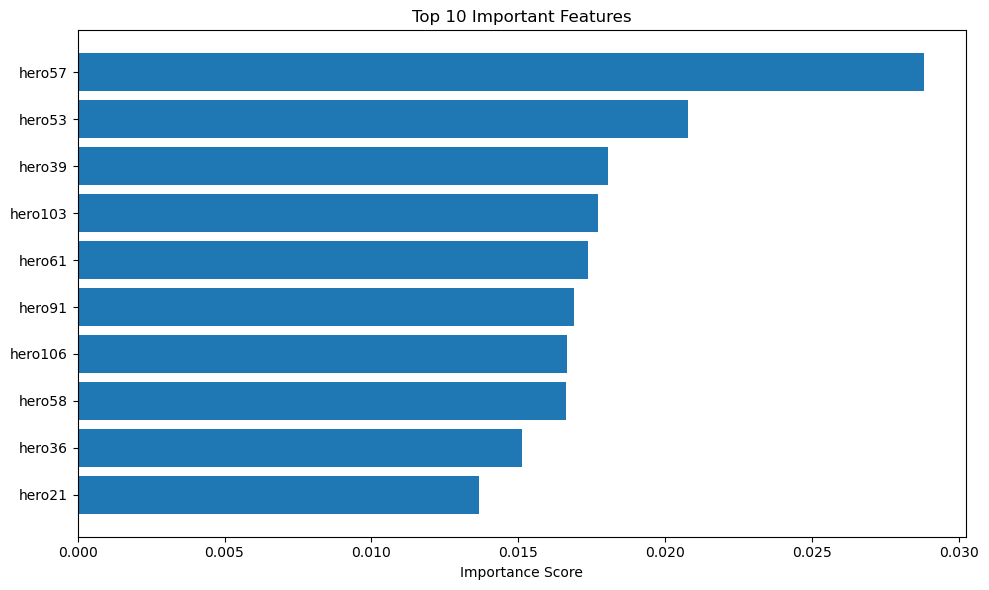

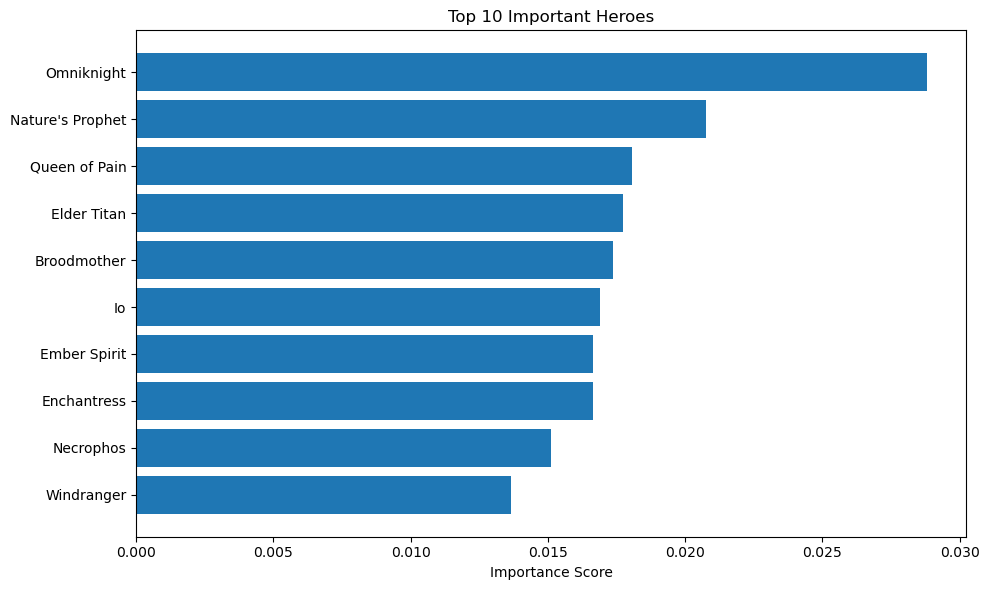

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and map to actual names
feature_importances = xgb_clf.feature_importances_
feature_names = X.columns  # Actual column names from the original DataFrame

# Sort top 10 features by importance
top_indices = np.argsort(feature_importances)[-10:][::-1]
top_features = feature_names[top_indices]
top_scores = feature_importances[top_indices]

# Plot manually
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_scores)
plt.gca().invert_yaxis()  # Highest score at the top
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


# Convert heroID feature labels to hero names
readable_labels = convert_to_hero_name(top_features)

plt.figure(figsize=(10, 6))
plt.barh(readable_labels, top_scores)
plt.gca().invert_yaxis()
plt.title("Top 10 Important Heroes")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()



In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)


In [5]:
#XG Boost model



# Replace -1 with 0 in both training and test targets
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)


In [6]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_clf.predict(X_test_scaled)


C:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:11:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


NameError: name 'y_pred_logreg' is not defined

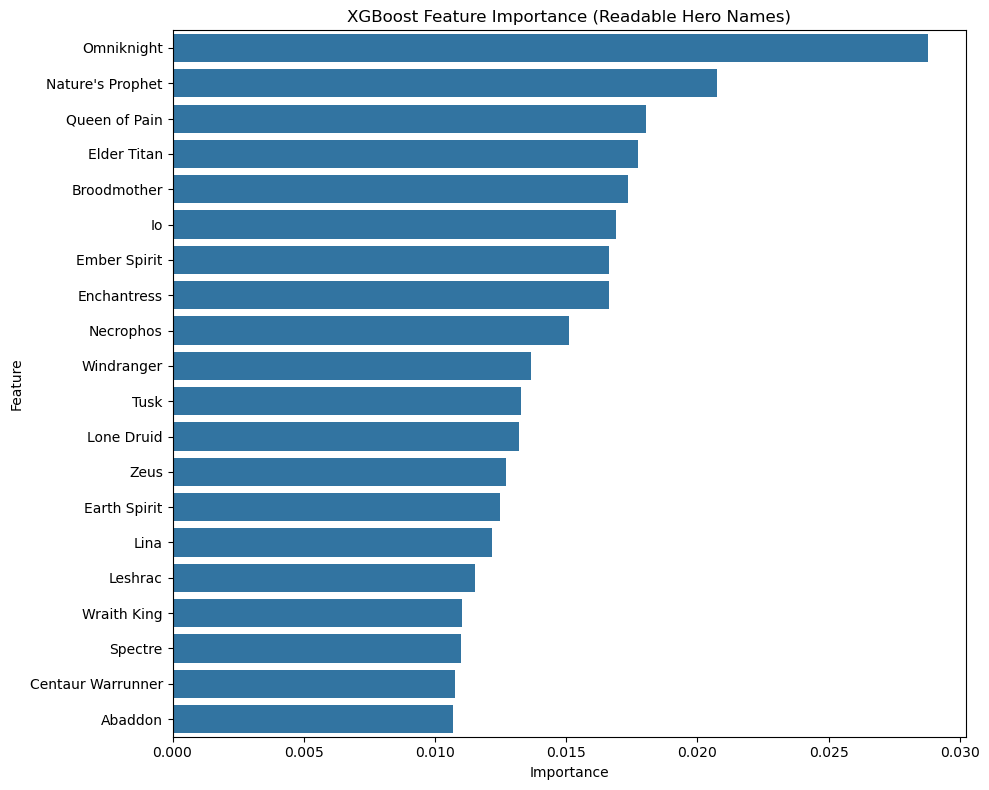

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
readable_labels = convert_to_hero_name(top_features)
feature_names = X.columns
importances = xgb_clf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Function to map 'hero57' to 'Lina'
def convert_hero(feature):
    match = re.match(r'hero(\d+)', feature)
    if match:
        hero_id = int(match.group(1))
        return hero_id_to_name.get(hero_id, feature)  # default to original if not in dict
    return feature

# Apply the mapping
feat_imp_df['Feature'] = feat_imp_df['Feature'].apply(convert_hero)

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20))
plt.title("XGBoost Feature Importance (Readable Hero Names)")
plt.tight_layout()
plt.show()